# BIG DATA ACCIDENT PREDICTION 


# SECTION 1

## Data Procressing
- This aspect is divided into, 
- 1. importing the necessary libraries
- 2. Loading the Three Dataset
- 3. Performing EDA on the Dataset
- 4. Data Cleaning
- 5. Data Merging

In [1]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from pandas_profiling import ProfileReport
from numpy import mean
from numpy import std
from sklearn.svm import SVC
import folium
import branca
import branca.colormap as cm
from sklearn.metrics import euclidean_distances
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [2]:
Accident = pd.read_csv('Road Safety Data - Accidents 2019.csv')
Vehicle = pd.read_csv('Road Safety Data- Vehicles 2019.csv')
Casualty = pd.read_csv('Road Safety Data - Casualties 2019.csv')


/Users/oluseyiolusegun/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/oluseyiolusegun/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
def EDA(dataname):
    percent_missing  = dataname.isnull().sum() * 100 / len(dataname)
    duplicate = dataname[dataname.duplicated(keep=False)]

    print('Records:', dataname.shape[0], '\nColumns:', dataname.shape[1])

    print(dataname.info())
    print(dataname.isna().sum())
    print(percent_missing)# returns the percentage of missing data in each column
    
    sns.heatmap(dataname.isnull(), yticklabels= False, cbar = False, cmap='viridis')
    
    return dataname



Records: 117536 
Columns: 32
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  object 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  int64  
 7   Number_of_Vehicles                           117536 non-null  int64  
 8   Number_of_Casualties                         117536 non-null  int64  
 9   Date                          

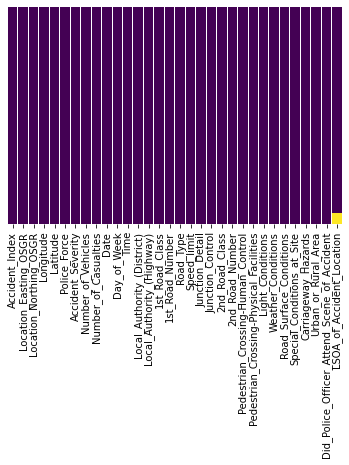

In [4]:
accident = EDA(Accident)


Records: 216381 
Columns: 23
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216381 entries, 0 to 216380
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Accident_Index                    216381 non-null  object
 1   Vehicle_Reference                 216381 non-null  int64 
 2   Vehicle_Type                      216381 non-null  int64 
 3   Towing_and_Articulation           216381 non-null  int64 
 4   Vehicle_Manoeuvre                 216381 non-null  int64 
 5   Vehicle_Location-Restricted_Lane  216381 non-null  int64 
 6   Junction_Location                 216381 non-null  int64 
 7   Skidding_and_Overturning          216381 non-null  int64 
 8   Hit_Object_in_Carriageway         216381 non-null  int64 
 9   Vehicle_Leaving_Carriageway       216381 non-null  int64 
 10  Hit_Object_off_Carriageway        216381 non-null  int64 
 11  1st_Point_of_Impact               21

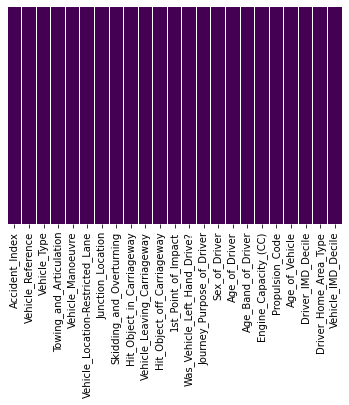

In [5]:
vehicle = EDA(Vehicle)

Records: 153158 
Columns: 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153158 entries, 0 to 153157
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      153158 non-null  object
 1   Vehicle_Reference                   153158 non-null  int64 
 2   Casualty_Reference                  153158 non-null  int64 
 3   Casualty_Class                      153158 non-null  int64 
 4   Sex_of_Casualty                     153158 non-null  int64 
 5   Age_of_Casualty                     153158 non-null  int64 
 6   Age_Band_of_Casualty                153158 non-null  int64 
 7   Casualty_Severity                   153158 non-null  int64 
 8   Pedestrian_Location                 153158 non-null  int64 
 9   Pedestrian_Movement                 153158 non-null  int64 
 10  Car_Passenger                       153158 non-null  int64 
 11  Bus_or_Coa

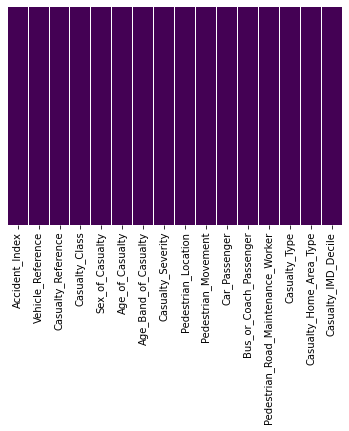

In [6]:
casaulty = EDA(Casualty)

## DATA CLEANING
- Longitude
- Latitude
- Location_Easting_OSGR                       
- Location_Northing_OSGR 
- Time
- LSOA_of_Accident_Location

In [7]:
Accident['Latitude'].fillna(0, inplace= True) 
Accident['Longitude'].fillna(0, inplace= True) 
Accident['Location_Easting_OSGR'].fillna(0, inplace= True) 
Accident['Location_Northing_OSGR'].fillna(0, inplace= True)

def Replace_Zeros (PF):
   
 #Create a new dataset where Police force = PF   
    police_force = Accident[Accident['Police_Force'] == PF ] 
    
#Create another dataset of highest occur latitudes
    filter_police_force = police_force [police_force['Number_of_Casualties'] == (police_force['Number_of_Casualties'].max())] 

#replace the corresponding values of the columns that are 11 with the values from the highest occuring latitude dataset
    for index in Accident.index:
        
        if (Accident.iloc[index, 4] == 0) & (Accident.iloc[index, 5] == PF):
        
        
            Accident.iloc[index, 4] = filter_police_force.iloc[0, 4]
            Accident.iloc[index, 1] = filter_police_force.iloc[0, 1]
            Accident.iloc[index, 2] = filter_police_force.iloc[0, 2]
            Accident.iloc[index, 3] = filter_police_force.iloc[0, 3]
def clean_latitude_longitude():

    missing_data_police_force = []

    for number in (Accident [Accident['Latitude'] == 0] ['Police_Force'].unique()):
    
        missing_data_police_force.append(number)
    for numbers in missing_data_police_force:
        Replace_Zeros(numbers)

clean_latitude_longitude()
    

In [8]:
# Time
Accident[Accident['Time'].isnull()]['Light_Conditions'].unique()

array([7, 1, 4])

- To clean the time column, the Light conditions of the null values will be inferred and the mode of those values will be used to fill the Null

In [9]:
def clean_time():
    Accident['Time'] = np.where ( (Accident['Time'].isnull()) & (Accident['Light_Conditions']== 7)
                                 , Accident [Accident['Light_Conditions'] == 7]['Time'].mode()
                                 , Accident['Time'] )
    Accident['Time'] = np.where ( (Accident['Time'].isnull()) & (Accident['Light_Conditions']== 1)
                                 , Accident [Accident['Light_Conditions'] == 1]['Time'].mode()
                                 , Accident['Time'] )
    Accident['Time'] = np.where ( (Accident['Time'].isnull()) & (Accident['Light_Conditions']== 4)
                                 , Accident [Accident['Light_Conditions'] == 4]['Time'].mode()
                                 , Accident['Time'] )
    

clean_time()

In [10]:
Accident[Accident['LSOA_of_Accident_Location'].isnull()]['Local_Authority_(District)'].unique()

array([114,  90,  95,  91, 130, 128, 129, 187, 185, 182, 186, 181, 206,
       233, 292, 544, 557, 583, 645, 724, 741, 753, 927, 933, 941, 936,
       911, 910, 930, 934, 918, 912, 925, 929, 923, 940, 914, 921, 924,
       939, 915, 935, 938, 926, 919, 932, 928, 931, 937, 916, 922, 920,
       913, 917])

- After view the local district, Districts in England and Wales can be filled infering from the data after grouping the local authority district and the lsoa of Accident location

In [11]:
Accident['LSOA_of_Accident_Location'] = Accident.groupby('Local_Authority_(District)')['LSOA_of_Accident_Location'].ffill()


In [12]:
Accident['LSOA_of_Accident_Location'] = Accident['LSOA_of_Accident_Location'].fillna('Unknown')

## ACCIDENT DATASET

- it is important to relate the accident severity to the numerical data(number of vehicles and casualty) in the accident dataset

In [13]:
def accident_important(df):
    reformat_df = df[['Accident_Severity','Number_of_Vehicles', 'Number_of_Casualties']]
    reformat_df['Number_of_Vehicles'] = reformat_df['Number_of_Vehicles'].div(reformat_df['Number_of_Vehicles'].max())
    reformat_df['Number_of_Casualties'] = reformat_df['Number_of_Casualties'].div(reformat_df['Number_of_Casualties'].max()).mul(2)
    return reformat_df.sum(axis = 1).values

Accident['Importance'] = accident_important(Accident)

<ipython-input-13-b818db72e39e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reformat_df['Number_of_Vehicles'] = reformat_df['Number_of_Vehicles'].div(reformat_df['Number_of_Vehicles'].max())
<ipython-input-13-b818db72e39e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reformat_df['Number_of_Casualties'] = reformat_df['Number_of_Casualties'].div(reformat_df['Number_of_Casualties'].max()).mul(2)


In [14]:
Accident

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Importance
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,5,1,1,1,0,0,1,3,E01004762,3.233032
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,4,1,1,0,0,1,3,E01003117,3.156109
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,4,1,1,0,0,1,1,E01000943,3.156109
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,0,4,1,1,0,0,1,1,E01000973,2.097285
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,0,4,1,1,0,0,1,1,E01000546,3.194570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117531,2019984106919,312635.0,573392.0,-3.368899,55.047323,98,3,1,1,18/05/2019,...,0,1,1,2,0,0,2,1,Unknown,3.097285
117532,2019984107019,337522.0,591682.0,-2.983499,55.215407,98,3,4,1,30/05/2019,...,0,1,1,2,0,0,2,1,Unknown,3.273756
117533,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,21/06/2019,...,0,1,1,1,0,0,2,2,Unknown,3.156109
117534,2019984107419,336525.0,584226.0,-2.997491,55.148292,98,3,1,1,29/06/2019,...,0,1,1,1,0,0,2,2,Unknown,3.097285


- create a Date series 

In [15]:
date = Accident['Date'].str.cat(Accident['Time'], sep= ' ')
date = pd.to_datetime(date)
Accident['Date_time'] = date
Accident['Hour'] = date.dt.hour
Accident['Hour'] = Accident['Hour'].astype('int')
Accident['date'] = pd.to_datetime(Accident['Date'])
Accident['Week'] = pd.to_datetime(Accident['Date']).dt.week
Accident['Day'] = Accident['date'].dt.strftime('%d')
Accident['Month'] = Accident['date'].dt.strftime('%b')


<ipython-input-15-ad228d4eed61>:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  Accident['Week'] = pd.to_datetime(Accident['Date']).dt.week


In [16]:
def create_time_class(hour):
        if hour >= 6 and hour < 12:
            return 'Morning Rush '
        elif hour >= 12 and hour < 16:
            return 'Afternoon hours '
        elif hour >=16  and hour < 20:
            return 'Evening Rush '
        else:
            return 'Night'

Accident['Daytime'] = Accident['Hour'].apply(create_time_class)


## Data Merging

In [17]:
Accident['Accident_Index'] = Accident['Accident_Index'].astype(str)
Vehicle['Accident_Index'] = Vehicle['Accident_Index'].astype(str)
Casualty['Accident_Index'] = Casualty['Accident_Index'].astype(str)

In [18]:
V_C = Accident.merge(Vehicle, on = 'Accident_Index')
final_df = V_C.merge(Casualty,  on = ['Vehicle_Reference','Accident_Index'])     

final_df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,9,3,0,0,0,0,0,9,1,2
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,-1,3,0,0,1,0,0,9,1,5
2,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,-1,3,0,0,2,0,0,9,1,5
3,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,5,3,0,0,0,0,0,9,1,3
4,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,5,3,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153153,2019984106919,312635.0,573392.0,-3.368899,55.047323,98,3,1,1,18/05/2019,...,5,3,0,0,0,0,0,19,3,6
153154,2019984107019,337522.0,591682.0,-2.983499,55.215407,98,3,4,1,30/05/2019,...,5,3,0,0,0,0,0,19,1,1
153155,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,21/06/2019,...,9,3,0,0,0,0,0,9,3,7
153156,2019984107419,336525.0,584226.0,-2.997491,55.148292,98,3,1,1,29/06/2019,...,8,3,5,3,0,0,0,0,3,8


# SECTION 2 - Analysis

## Are there Significant Hours of the Day , and Days of the week , on which Accidents occurs?

- ## 1. HOUR OF THE DAY

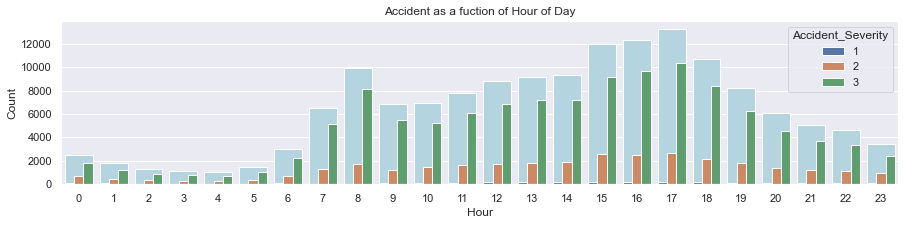

In [19]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,3))
Hourplot = sns.countplot(x='Hour',data=final_df, color = 'lightblue')
sns.countplot(x='Hour', hue = 'Accident_Severity',data=final_df)
Hourplot.set(xlabel='Hour', ylabel='Count', title= 'Accident as a fuction of Hour of Day')

plt.show()




- Theres a build up in the accidents from the after noon hours to the evening hours with the highest number of accidents occurring during the 17 hours( 5 pm).

- This can be further analysed by binning the hours

In [20]:
def create_time_class(hour):
    if hour >= 6 and hour < 12:
        return 'Morning Rush '
    elif hour >= 12 and hour < 16:
        return 'Afternoon hours '
    elif hour >=16  and hour < 20:
        return 'Evening Rush '
    else:
        return 'Night'

final_df['Daytime'] = final_df['Hour'].apply(create_time_class)

In [21]:
final_df['Daytime'].value_counts()
hour = pd.DataFrame(final_df.loc[:,'Daytime'].value_counts())
hour.columns = ['Count']

# Normalize the values to display as a percentage proportion of the whole.
percentages = pd.DataFrame(round(final_df.loc[:,'Daytime'].value_counts(normalize=True)*100,2).map(lambda x : str(x)+'%'))
percentages.columns = ['% Distribution']
hour.join(percentages)

,Count,% Distribution
Evening Rush,44480,29.04%
Morning Rush,40990,26.76%
Afternoon hours,39166,25.57%
Night,28522,18.62%


- Showing the plot

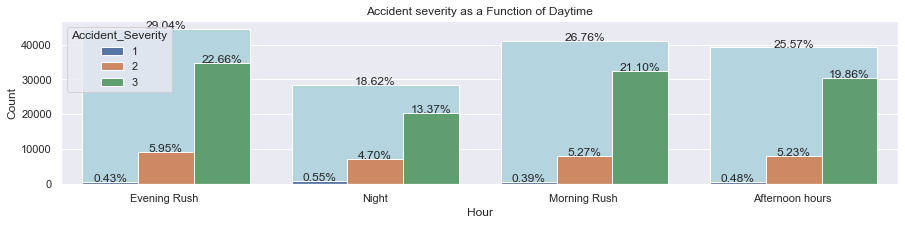

In [22]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,3))
sns.countplot(x='Daytime', data=final_df, color = 'lightblue')
Hourplot = sns.countplot(x='Daytime', hue = 'Accident_Severity', data=final_df)
Hourplot.set(xlabel='Hour', ylabel='Count', title = 'Accident severity as a Function of Daytime')
for p in Hourplot.patches: 
    height = p.get_height() 
    Hourplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(final_df))*100)+'%',  
      ha="center") 
 
plt.show()



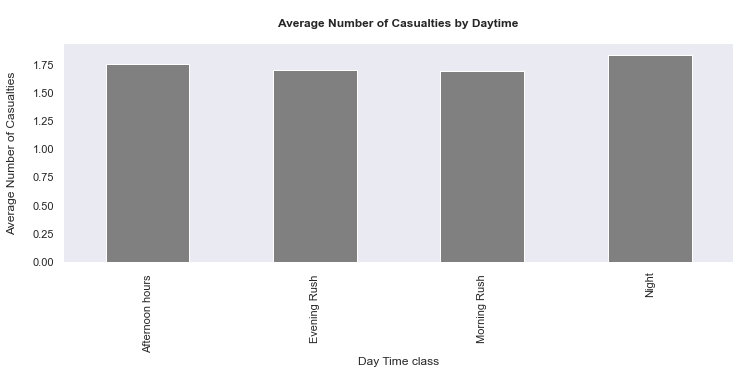

In [23]:
# plot average number  of casualties by daytime
final_df.groupby('Daytime')['Number_of_Casualties'].mean().plot(kind='bar', color='grey', 
                                                                 figsize=(12,4), grid=False)
# plt.xticks(np.arange(5),  rotation='horizontal')
# plt.ylim((1,1.5))
plt.xlabel('Day Time class'), plt.ylabel('Average Number of Casualties\n')
plt.title('\nAverage Number of Casualties by Daytime\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);



- from the plot, it can be summarized that 

- ## 2. DAY OF THE WEEK

<Figure size 1080x360 with 0 Axes>

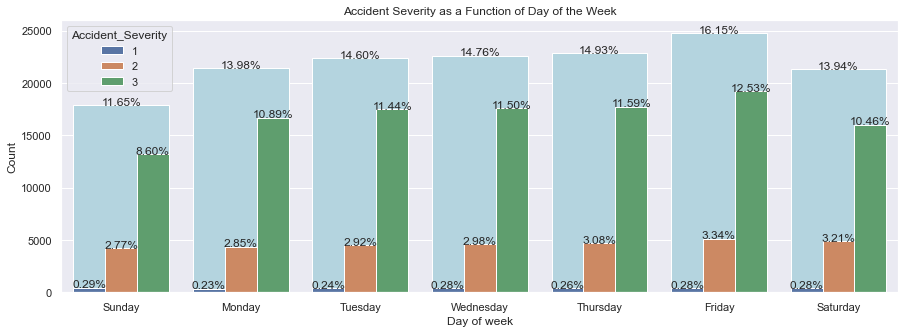

In [24]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))


sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
weekplot = sns.countplot(x='Day_of_Week',data = final_df, color = 'lightblue')
weekplot = sns.countplot(x='Day_of_Week',hue = 'Accident_Severity', data = final_df)
weekplot.set(xlabel='Day of week', ylabel='Count', title = 'Accident Severity as a Function of Day of the Week')
for p in weekplot.patches: 
    height = p.get_height() 
    weekplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(final_df))*100)+'%',  
      ha="center") 
weekplot.set(xticklabels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.show()



# Month

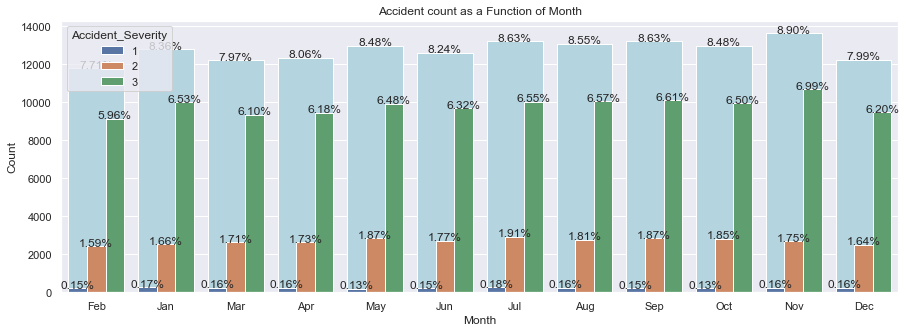

In [25]:

sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
month = sns.countplot(x='Month',data = final_df, color = 'lightblue')
sns.countplot(x='Month',data = final_df,hue = 'Accident_Severity')
month.set(xlabel='Month', ylabel='Count', title = 'Accident count as a Function of Month')
for p in month.patches: 
    height = p.get_height() 
    month.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(final_df))*100)+'%',  
      ha="center") 

plt.show()




## For motorbikes, are there significant hours of the day and days of the week on which accidents occur?

- Bin the vehicle type column into categories of motorbikes, cars, vans, bus and other

In [26]:
def label_vehicle (row):
    if row['Vehicle_Type']==2 or row['Vehicle_Type']==3 or row['Vehicle_Type']==4 or row['Vehicle_Type']==5 or row['Vehicle_Type']==97 or row['Vehicle_Type']==23:
        return 'Motorcycle'
    if row['Vehicle_Type']== 10  or row['Vehicle_Type']==  11:
        return 'Bus'
    if row['Vehicle_Type'] == 9 or row['Vehicle_Type']==8:
        return 'Car'
    if row['Vehicle_Type']== 19 or row['Vehicle_Type']==20 or row['Vehicle_Type']==21 or row['Vehicle_Type']==98:
        return 'Van'
    else:
        return 'Other Vehicles'
final_df['Vehicle Class'] = final_df.apply (label_vehicle, axis = 1 )

In [27]:
#separate the dataset into motorbike
motorbikes = final_df[final_df['Vehicle Class']== 'Motorcycle']


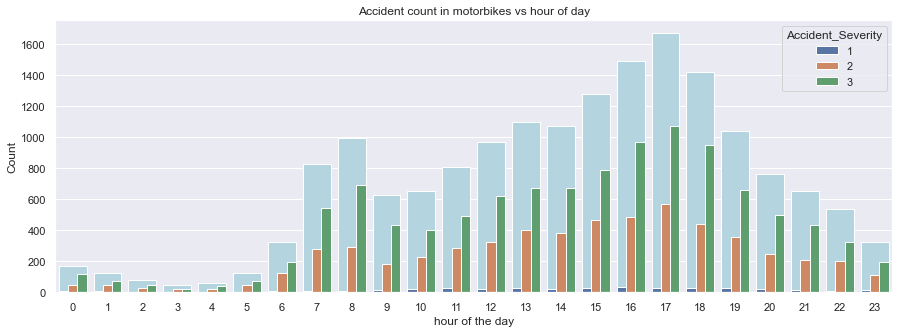

In [28]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
motorbike_hour =sns.countplot(x= motorbikes['Hour'], color = 'lightblue')
sns.countplot(x= 'Hour', hue = 'Accident_Severity', data = motorbikes)
motorbike_hour.set(xlabel='hour of the day', ylabel='Count', title = 'Accident count in motorbikes vs hour of day')

    
 
plt.show()

# sns.set(style="darkgrid")
# plt.figure(figsize=(15,5))
# p =sns.countplot(x= 'Hour', hue = 'Accident_Severity', data = motorbikes)
# p.set(title = 'Accident severity as a function of Hour of the Day')
# plt.show()



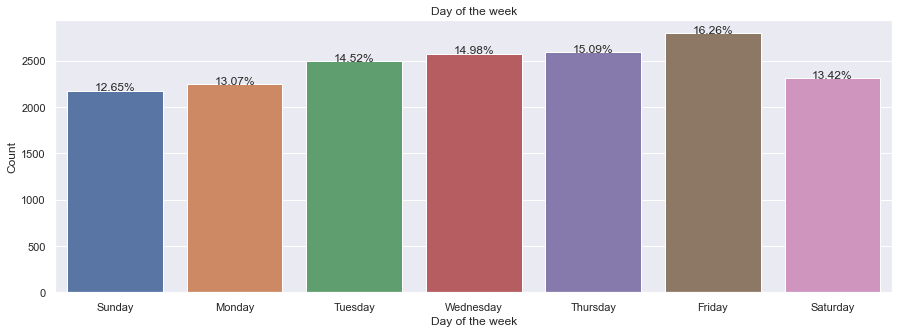

In [29]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
m=sns.countplot(x =motorbikes['Day_of_Week'])
m.set(xlabel='Day of the week', ylabel='Count', title = 'Day of the week')
for p in m.patches: 
    height = p.get_height() 
    m.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(motorbikes))*100)+'%',  
      ha="center") 
m.set(xticklabels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.show()

-  Morning rush hour (between 6:00 AM and 11:00 AM) and evening rush hour are the two times when all severity peaks (between 3:00 PM and 7:00 PM) with the peak time in both categories at 8 am and 5 pm respectively. According to accident severity figure, most fatal accidents occur at the night hours. This is like the overall trend of the dataset

- From the figures below, there are some notable characteristics, such as the fact that accidents rise progressively throughout the week, and peak on Friday. The most significant trend is that the least number of accidents occurs on Sunday, when there are fewer vehicles on the road, motorists are less likely to be involved in an accident. 




## For Pedestrian, are there significant hours of the day and days of the week on which accidents occur?

In [30]:
pedestrian = final_df[final_df['Casualty_Class']== 3]


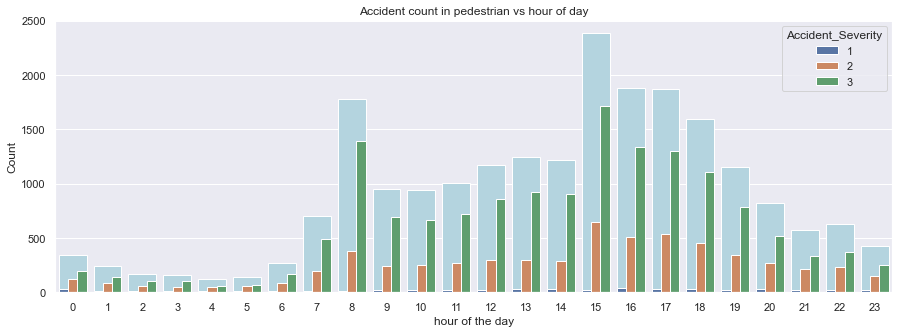

In [31]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
p=sns.countplot(x= pedestrian['Hour'], color = 'lightblue')
sns.countplot(x= 'Hour', hue = 'Accident_Severity', data = pedestrian)
p.set(xlabel='hour of the day', ylabel='Count',title ='Accident count in pedestrian vs hour of day')
 
plt.show()



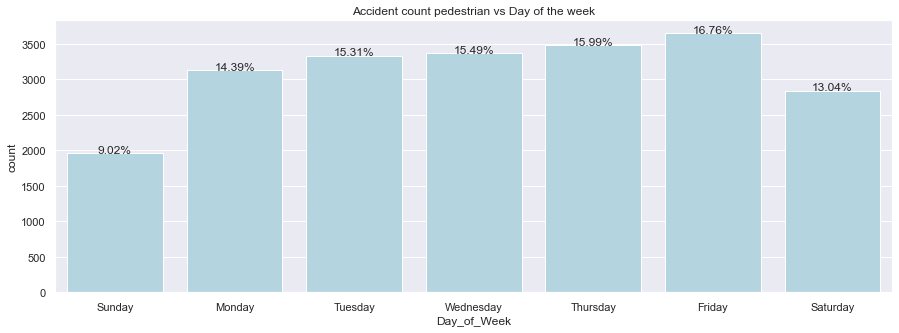

In [32]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
m=sns.countplot(x =pedestrian['Day_of_Week'], color = 'lightblue')
m.set(title = 'Accident count pedestrian vs Day of the week')
for p in m.patches: 
    height = p.get_height() 
    m.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(pedestrian))*100)+'%',  
      ha="center") 
m.set(xticklabels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.show()

- There are some notable characteristics, such as the fact that accidents rise progressively throughout the week, and peak on Friday. The most significant trend is that the least number of accidents occurs on Monday

## IMPACT OF DAYLIGHT SAVING

- To analysis the effect of Daylight saving time it is important to compare the number of accidents in theweek after Daylight saving time Starts and Ends
- Sunday, 31 March 2019 to Sunday, 27 October 2019. https://www.timeanddate.com/time/change/uk/london?year=2019




In [33]:
import datetime

In [34]:
Start_daylight=  '2019-04-01'
End_daylighyt = '2019-10-28'
print('Dayight saving time starts at week', datetime.date(2019, 4, 1).isocalendar()[1])
print('Dayight saving time Ends at week', datetime.date(2019, 10, 28).isocalendar()[1])



Dayight saving time starts at week 14
Dayight saving time Ends at week 44


### HYPOTHESIS TESTING

In [35]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

- To see the effect of Daylight saving, a t-test will be used to carry out a hypothesis test
- H1 = the mean of the sets are the same and daylight saving time does not have a significant effect
- H2 = the mean of the sets are not the same and daylight saving time  has a significant effect

In [36]:
one_week_after = final_df[(final_df['Week']== 15)].describe()['Number_of_Casualties']
one_week_after_end = final_df[(final_df['Week']== 45)].describe()['Number_of_Casualties']


In [37]:
stat, p_value = stats.levene(one_week_after,one_week_after_end)
for i in stat, p_value:
    if p_value > 0.5:
        print('The variance of the two means are unequal')
    else:
        print('The variance of the two means are equal')



The variance of the two means are unequal
The variance of the two means are unequal


In [38]:
t_test, p_value = stats.ttest_ind(a=one_week_after, b=one_week_after_end, equal_var = False)
for i in t_test, p_value:
    if p_value >= 0.5:
        print( 'we accept the null hypothesis')
    else:
        print('We accept the alternate hypothesis')


we accept the null hypothesis
we accept the null hypothesis


#### From the T- Test is can be seen that there not a significant effect of Daylight saving time since there's no significant difference in the mean of both dataset

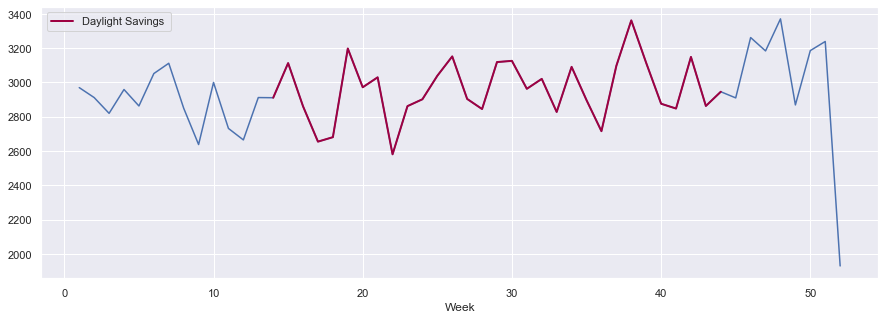

In [39]:
final_df.groupby(['Week'])['Accident_Index'].count().plot(legend = False)
##Dayligt saving period
final_df.loc[final_df.Week.between(14, 44)].groupby(['Week'])['Accident_Index'].count().plot(legend = True, cmap= plt.cm.Spectral,label = 'Daylight Savings ', figsize=(15,5), linewidth = 2) 
plt.show()

- From the figure above, there is an immediate decrease in the number of accidents in the week after day light saving time starts, there is an inverse effect in the number of accidents in the week after day light saving time ends, but overall, there are higher number of accidents during Daylight time saving periods.

## Effect of sunrise and sunset times in the accident

- In order to analysis the effect of sunrise and sunset times on accidents, it is important to note that these times vary in respects to the month and location of the accidents.
- using Hull and the Month of february as a case study, from https://www.timeanddate.com/sun/uk/kingston-upon-hull?month=2&year=2019 , the sunrise and sunset times vary from hours with 6-8 and 16 - 18 respectively

In [40]:
month  = final_df[(final_df['Month']== 'Feb') & (final_df['Local_Authority_(District)']==228)]


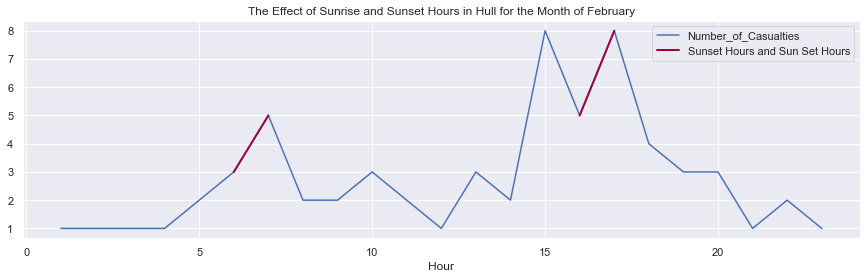

In [41]:
month.groupby(['Hour'])['Accident_Index'].count().plot(legend = False)
month.loc[month.Hour.between(6, 7)].groupby(['Hour'])['Number_of_Casualties'].count().plot(
    legend = True, cmap= plt.cm.Spectral, figsize=(15,5), linewidth = 2)
month.loc[month.Hour.between(16, 17)].groupby(['Hour'])['Accident_Index'].count().plot(
     legend = True, cmap= plt.cm.Spectral,label = 'Sunset Hours and Sun Set Hours', figsize=(15,4), linewidth = 2) 
import matplotlib.pyplot as plt
plt.title('The Effect of Sunrise and Sunset Hours in Hull for the Month of February')

plt.show()

- A sharp increase in the number of accidents during sunrise and sunset times is an indication from the graph that sunrise and sunset times have an effect on accident 

# conditions


In [42]:
accident = Accident[Accident.Weather_Conditions != -1]
accident = Accident[Accident.Road_Surface_Conditions != -1]
conditions = accident[['Light_Conditions','Weather_Conditions','Road_Surface_Conditions', 'Accident_Severity']]
conditions['Accident_Severity'] = conditions['Accident_Severity'].replace([1,2,3], ['Fatal', 'Serious', 'Slight']) 

<ipython-input-42-8345a926f8e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conditions['Accident_Severity'] = conditions['Accident_Severity'].replace([1,2,3], ['Fatal', 'Serious', 'Slight'])


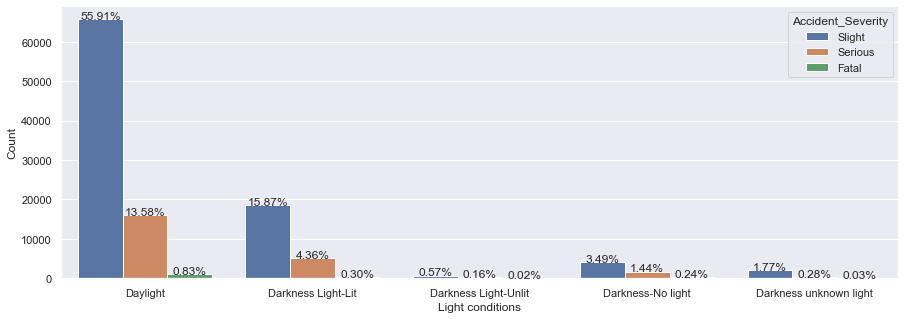

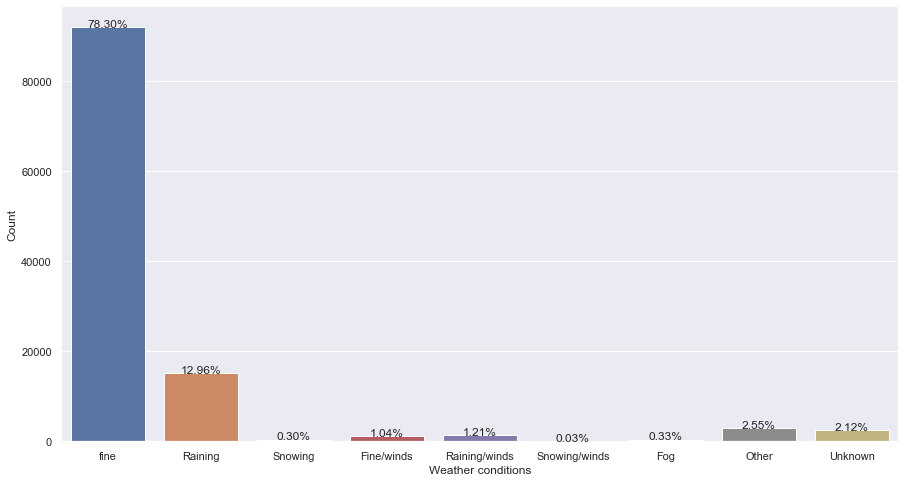

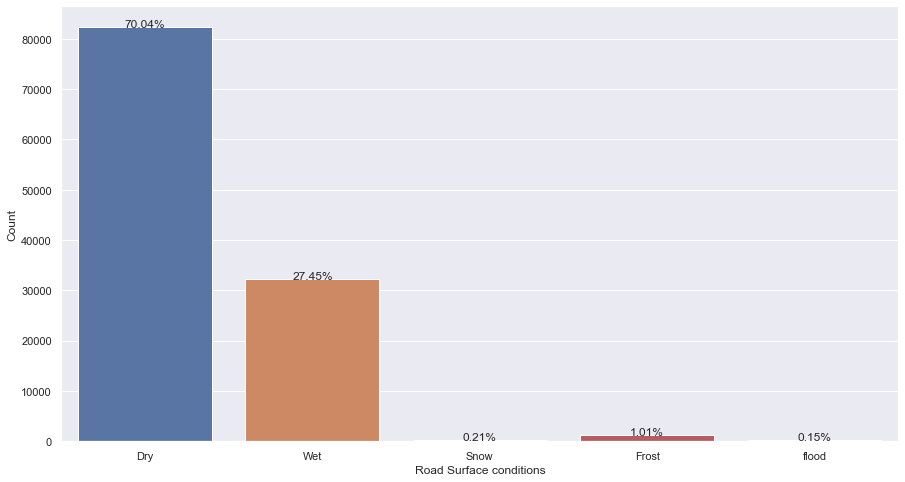

In [43]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
lightplot = sns.countplot(x='Light_Conditions',data=conditions, hue='Accident_Severity',hue_order=['Slight','Serious','Fatal'])
# lightplot = sns.countplot(x='Light_Conditions',data=conditions)
lightplot.set(xlabel='Light conditions', ylabel='Count',xticklabels=['Daylight','Darkness Light-Lit','Darkness Light-Unlit','Darkness-No light','Darkness unknown light'])
for p in lightplot.patches: 
    height = p.get_height() 
    lightplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(Accident))*100)+'%',  
      ha="center")     
plt.show()

sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
weatherplot = sns.countplot(x='Weather_Conditions',data=conditions)
weatherplot.set(xlabel='Weather conditions', ylabel='Count',xticklabels=['fine','Raining','Snowing','Fine/winds',
                                                                         'Raining/winds','Snowing/winds','Fog','Other','Unknown'])
for p in weatherplot.patches: 
    height = p.get_height() 
    weatherplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(Accident))*100)+'%',  
      ha="center") 
plt.show()

sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
roadplot = sns.countplot(x='Road_Surface_Conditions',data=conditions)
roadplot.set(xlabel='Road Surface conditions', ylabel='Count',xticklabels=['Dry','Wet','Snow','Frost','flood'])
for p in roadplot.patches: 
    height = p.get_height() 
    roadplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(Accident))*100)+'%',  
      ha="center") 
plt.show()

In [44]:
final_df.groupby('Speed_limit')['Accident_Severity'].value_counts()

Speed_limit  Accident_Severity
-1           3                       81
             2                        5
 20          3                    11298
             2                     2154
             1                       74
 30          3                    68307
             2                    16333
             1                      773
 40          3                    10574
             2                     3168
             1                      345
 50          3                     5160
             2                     1601
             1                      198
 60          3                    14029
             2                     6751
             1                     1081
 70          3                     8477
             2                     2378
             1                      371
Name: Accident_Severity, dtype: int64

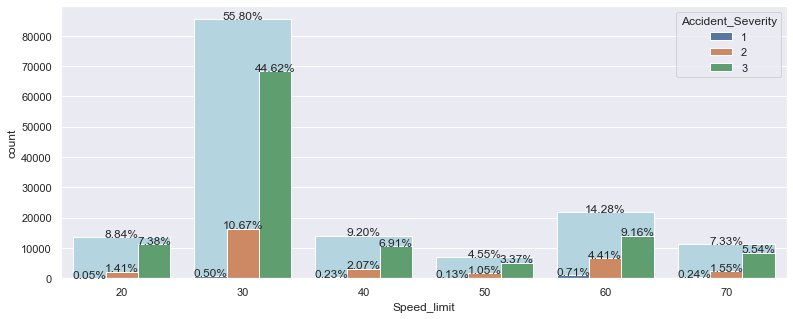

In [45]:
speed = final_df
speed = speed[speed['Speed_limit']!= -1]
plt.figure(figsize=(13,5))
sns.countplot(x= 'Speed_limit',data = speed , color= 'lightblue')
s = sns.countplot(x= 'Speed_limit', hue = 'Accident_Severity',data = speed)
                                                                         
for p in s.patches: 
    height = p.get_height() 
    s.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(speed))*100)+'%',  
      ha="center") 
plt.show()

In [46]:
weather = pd.get_dummies(final_df['Weather_Conditions'], 'weather')
light = pd.get_dummies(final_df['Light_Conditions'], 'light')
road = pd.get_dummies(final_df['Road_Surface_Conditions'], 'Road')
severity = pd.get_dummies(final_df['Accident_Severity'], 'Severity')

condition = pd.concat([severity,light,road, weather], axis = 1)
frequent = apriori(condition, min_support = 0.5, use_colnames = True)
rule = association_rules(frequent, metric = 'lift', min_threshold = 0.5)
rule[(rule['confidence']> 0.8) & (rule['lift']>1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(light_1),(weather_1),0.704234,0.787860,0.582954,0.827784,1.050675,0.028116,1.231831
10,(weather_1),(Road_1),0.787860,0.695674,0.659450,0.837014,1.203171,0.111356,1.867196
11,(Road_1),(weather_1),0.695674,0.787860,0.659450,0.947930,1.203171,0.111356,4.074105
12,"(Severity_3, weather_1)",(Road_1),0.603096,0.695674,0.507985,0.842296,1.210762,0.088427,1.929726
13,"(Severity_3, Road_1)",(weather_1),0.537569,0.787860,0.507985,0.944967,1.199411,0.084456,3.854813
18,"(light_1, Road_1)",(weather_1),0.537380,0.787860,0.511465,0.951776,1.208053,0.088086,4.399094
19,"(light_1, weather_1)",(Road_1),0.582954,0.695674,0.511465,0.877369,1.261179,0.105920,2.481639


- from the graphs the most number of accidents occur during Daylight, fine weather conditions and dry Road surfaces
- The Association rule proves this setting the support to a threshold of 0.5 and confidence to 0.8
- The posted speed limit of 30mph has the highest number of accidents

# Geographical conditions

posx and posy should be finite values
posx and posy should be finite values


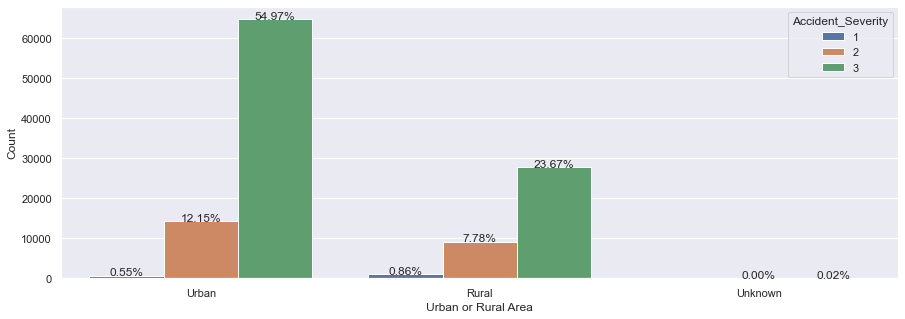

In [47]:

sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
lightplot = sns.countplot(x='Urban_or_Rural_Area',data = Accident, hue='Accident_Severity')
lightplot.set(xlabel='Urban or Rural Area', ylabel='Count',xticklabels=['Urban','Rural','Unknown'])
for p in lightplot.patches: 
    height = p.get_height() 
    lightplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(Accident['Accident_Severity']))*100)+'%',  
      ha="center")     
plt.show()


#sns.countplot(x= Accident['Urban_or_Rural_Area'], hue = Accident['Accident_Severity'])

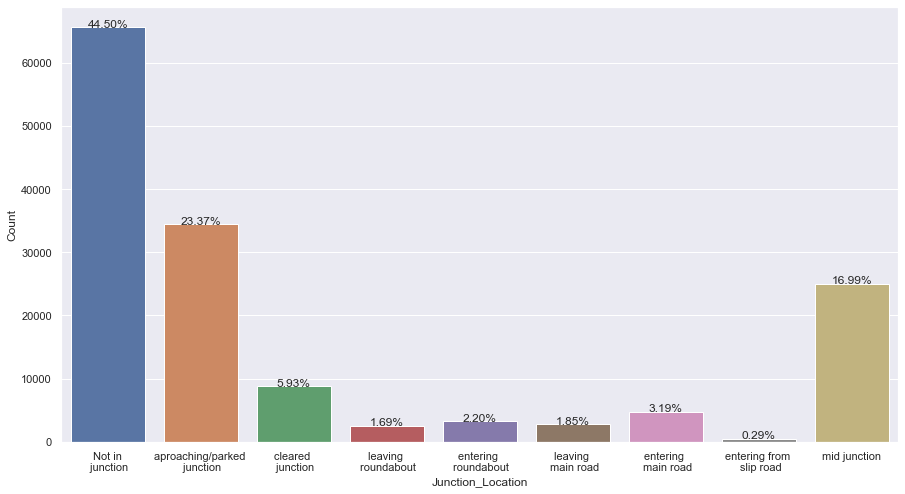

In [48]:
location = final_df
location = location[location.Junction_Location != -1]
plt.figure(figsize=(15,8))

junctionplot = sns.countplot(x='Junction_Location',data=location)
junctionplot.set(xlabel='Junction_Location',ylabel='Count',xticklabels=['Not in\n junction','aproaching/parked \n junction','cleared \n junction','leaving \n roundabout','entering \n roundabout','leaving \n main road','entering \n main road','entering from \n slip road','mid junction'])
for p in junctionplot.patches: 
    height = p.get_height() 
    junctionplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(location))*100)+'%',  
      ha="center") 
plt.show()


### FInding the optimal Number of clusters using the Elbow diagram method 

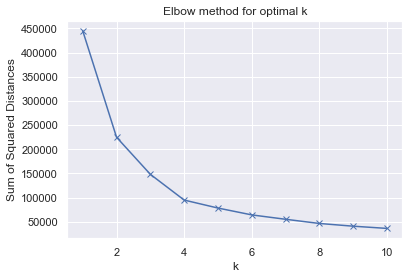

In [49]:
wcss = []
K = range(1,11,1)
for k in K:
    km = KMeans(n_clusters=k)
    KM = km.fit(Accident[['Longitude','Latitude']])
    wcss.append(KM.inertia_)
    
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow method for optimal k')
plt.show()

In [50]:
K = range(2,5)
for k in K:
    km = KMeans(n_clusters=k)
    pred = km.fit_predict(Accident[['Longitude','Latitude']])
    centers = km.cluster_centers_
    
    scores = silhouette_score(Accident[['Longitude','Latitude']], pred)
    print("For k = {}, silhouette score is {})".format(k, scores))



For k = 2, silhouette score is 0.4859474520901071)
For k = 3, silhouette score is 0.4968506488041649)
For k = 4, silhouette score is 0.5542959702904265)


- from the Elbow method graph and combination of the silhoutte score the optimal value of k is 4

/Users/oluseyiolusegun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Clustering of accidents by region in the United Kingdom')

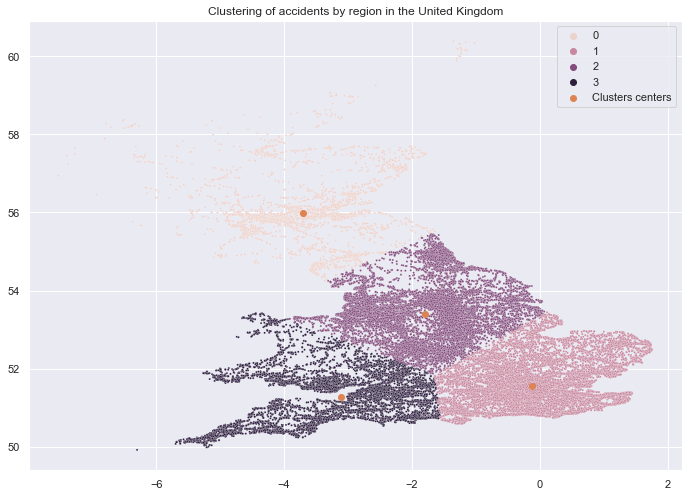

In [51]:
kmeans = KMeans(n_clusters= 4)
kmeans.fit(Accident[['Longitude','Latitude']])
Accident['Cluster'] = kmeans.labels_


a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(Accident['Longitude'].values,Accident['Latitude'].values, s=4, hue = Accident['Cluster'].values)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], label = 'Clusters centers')
plt.legend()
plt.title('Clustering of accidents by region in the United Kingdom')

In [52]:
def score_silhouette_custom(df, centre):
    df_array = df.values
    silhouette_custom = 0
    for a in range(len(df_array)):
        silhouette_custom+=euclidean_distances([df_array[a], centre])[0][1]
    return round(len(df_array)/silhouette_custom,2)

- In order to see on which cluster the accident density was the greatest. The silhouette score was simplified and used the Euclidean distance as metric (d).We can therefore say that if this score is high, the accidents are very targeted and occur in a very big geographical area.

In [53]:
def color(n_cluster, df):
    df_treatment = df[df['Cluster'] == n_cluster]
    return df_treatment['Importance'].sum()/df_treatment.shape[0]

mini = 2.82
maxi = 2.99
colormap = cm.LinearColormap(colors=['lightgreen', 'red'], index=[mini,maxi],vmin=mini,vmax=maxi)

x_start = (Accident['Latitude'].max() + Accident['Latitude'].min()) / 2
y_start = (Accident['Longitude'].max() + Accident['Longitude'].min()) / 2
start_coord = (x_start, y_start)
m = folium.Map(location=start_coord, zoom_start=6)

tooltip = "Detail"
n_cluster = 0
for i in kmeans.cluster_centers_:
    decorticage = Accident[Accident['Cluster']==n_cluster][['Longitude','Latitude']]
    density = score_silhouette_custom(decorticage, i)
    proportion = color(n_cluster, Accident)
    folium.Circle(
        location=[i[1],i[0]],
        radius=40000* density,
        fill=True,
        color=colormap(proportion),
        fill_opacity=0.6,
        popup = "Importance"+ str(round(proportion,2)) +"\nDensity " + str(density) + "\n Cluster " + str(n_cluster),
  
    ).add_to(m)
    n_cluster+=1

m.add_child(colormap)
m

#### Four clusters centroids were located.
- cluster 1 located around Manchester and Sheffield 
- Cluster 2 located in Scotland around the major cities Glasgow and Edinburgh
- cluster 3 located around London 
- cluster 4 located in Cardiff
- using the Euclidean distance as a metric , london has the most targeted occurance of accident , this is supported by the fact that london is the largest city in the uk

In [54]:
m.save('Accident Cluster in the Uk.html')


### Ploting Fatal Accidents

In [55]:
# to investigate the fatal accident severity, the accident data must be created as 

Accident_f = Accident[Accident['Accident_Severity']==1]


In [56]:
uk=folium.Map(location =[54.9722 ,2.4609], control_scale=True, zoom_start = 6)
bordersStyle = {
    "color": 'green', 'weight': 1, 'fill': False}

folium.GeoJson(data='uk_regions.geojson', name ='Borders',style_function = lambda x: bordersStyle).add_to(uk)
grp = folium.FeatureGroup('Accident severity').add_to(uk)
for itr in range(len(Accident_f)):
    lat = Accident_f.iloc[itr]['Latitude']
    long = Accident_f.iloc[itr]['Longitude']
    acc = Accident_f.iloc[itr]['Accident_Severity']
    
    
    
    clr ='red' if acc == 1  else 'green'
    
    folium.Circle(
        location =[lat, long],
        color = clr,
        weight = 1,
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.1
        
        
        
).add_to(grp)





folium.LayerControl().add_to(uk)
uk

- from  the fatal accident map, although there is a concentration of accidents in large   cities like London, Manchester, Leeds, Liverpool, Glascow, Cardiff this might be due to the large population,but there are scatters of fatal accidents in smaller cities like Rippon, preston
- There  is no fatal accident in Northern ireland

In [57]:
uk.save('Map showing Fatal Accident in the uk.html')

<function matplotlib.pyplot.show(close=None, block=None)>

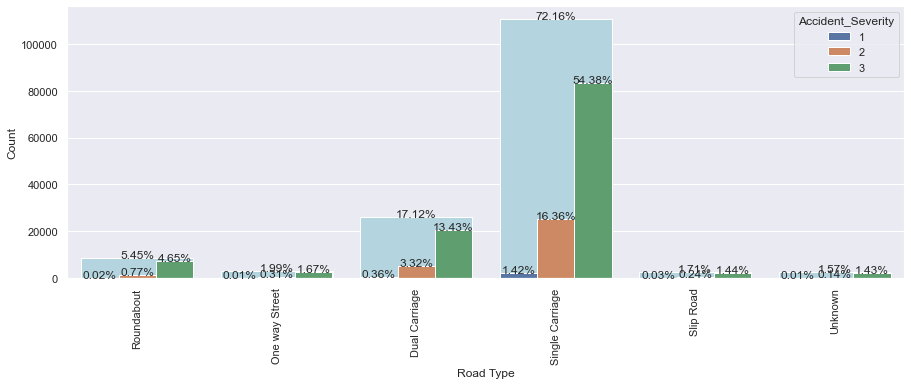

In [58]:
road = final_df
road = road[road['Road_Type']!= -1]
plt.figure(figsize=(15,5))
sns.countplot(x= 'Road_Type', data = road, color= 'lightblue')
s=sns.countplot(x= 'Road_Type', hue = 'Accident_Severity', data = road)
s.set(xlabel = 'Road Type', ylabel = 'Count', xticklabels= ['Roundabout', 'One way Street',
      'Dual Carriage', 'Single Carriage', 'Slip Road', 'Unknown'])
for p in s.patches: 
    height = p.get_height() 
    s.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(road))*100)+'%',  
      ha="center") 
plt.xticks(rotation=90)
plt.show

## Vehicle related Variables


### Type of vehicles


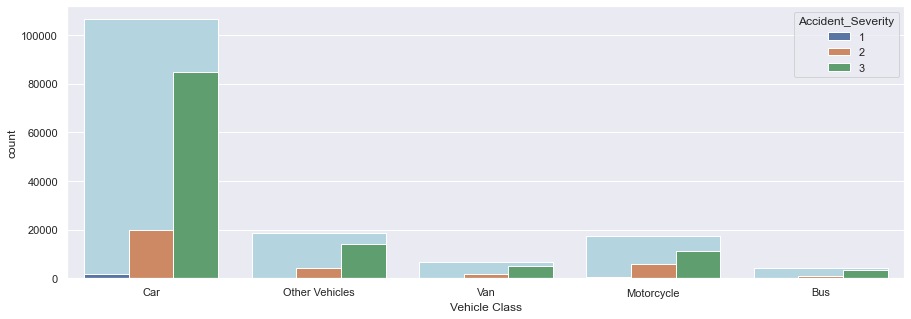

In [59]:
vehicle = final_df
vehicle = vehicle[vehicle != -1]
plt.figure(figsize=(15,5))
sns.countplot(x= vehicle['Vehicle Class'], color = 'lightblue')
sns.countplot(x = vehicle['Vehicle Class'], hue = vehicle['Accident_Severity'])
plt.show()

In [60]:
def label_age(age):
    if age <= 3:
        return '0-3 years'
    elif age >3 and age <=7:
        return '4-7 years'
    elif age >7 and age <=11:
        return '8-11 years'
    elif age >11 and age <=14:
        return '12-14 years'
    elif age >14 and age <=18:
        return '15-17 years'
    else:
        return '18 years+'
vehicle['Age_band_vehicle'] = vehicle['Age_of_Vehicle'].apply(label_age)

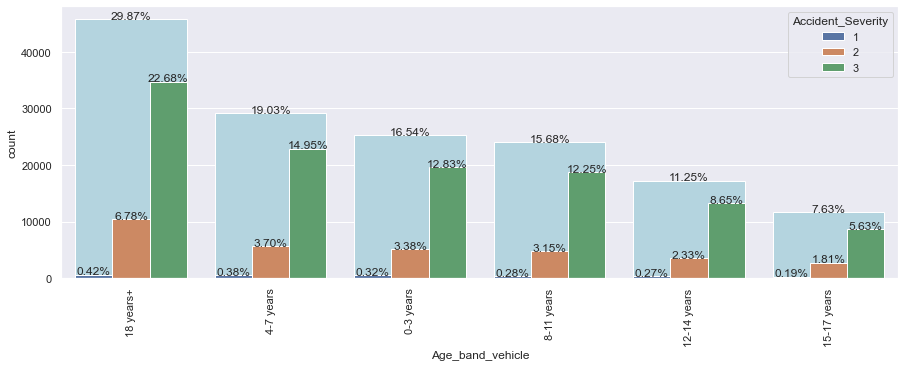

In [61]:
plt.figure(figsize=(15,5))
sns.countplot(x= vehicle['Age_band_vehicle'], color = 'lightblue')
v =sns.countplot(x= vehicle['Age_band_vehicle'], hue= vehicle['Accident_Severity'])
for p in v.patches: 
    height = p.get_height() 
    v.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(vehicle))*100)+'%',  
      ha="center") 
plt.xticks(rotation=90)
plt.show()


### Vehicle Manoeurve

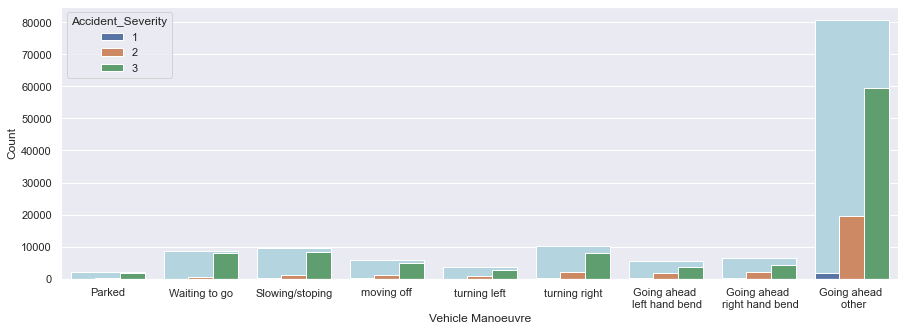

In [62]:
manoeuvre = final_df
manoeuvre = manoeuvre[
    (manoeuvre.Vehicle_Manoeuvre == 18) | (manoeuvre.Vehicle_Manoeuvre == 2) | (manoeuvre.Vehicle_Manoeuvre == 3) |
    (manoeuvre.Vehicle_Manoeuvre == 4) | (manoeuvre.Vehicle_Manoeuvre == 5) |(manoeuvre.Vehicle_Manoeuvre == 7) | 
    (manoeuvre.Vehicle_Manoeuvre == 9) |(manoeuvre.Vehicle_Manoeuvre == 16) |(manoeuvre.Vehicle_Manoeuvre == 17)
]
                
plt.figure(figsize=(15,5))

sns.countplot(x='Vehicle_Manoeuvre',data=manoeuvre, color = 'lightblue')
manoplot=sns.countplot(x='Vehicle_Manoeuvre', hue= 'Accident_Severity',data=manoeuvre)
manoplot.set(xlabel='Vehicle Manoeuvre',ylabel='Count',xticklabels=['Parked','Waiting to go','Slowing/stoping','moving off','turning left','turning right','Going ahead \n left hand bend','Going ahead \n right hand bend','Going ahead \n other'])

plt.show()

- 1) Vehicle going ahead of others have the highest chance of accident

## Driver related variables on Accident


In [63]:
sex = pd.get_dummies(final_df['Sex_of_Driver'], 'Sex')
purpose = pd.get_dummies(final_df['Journey_Purpose_of_Driver'], 'Journey_purpose')
Age_band = pd.get_dummies(final_df['Age_Band_of_Driver'], 'Age')
Driver_imd = pd.get_dummies(final_df['Driver_IMD_Decile'], 'Driver_Imd')
# severity = pd.get_dummies(final_df['Accident_Severity'], 'Severity')


Driver_variable = pd.concat([sex,Age_band, Driver_imd], axis = 1)
                     

In [64]:
frequent = apriori(Driver_variable , min_support = 0.1, use_colnames = True)
rule = association_rules(frequent, metric = 'lift', min_threshold = 1)

In [65]:
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sex_1),(Age_7),0.655930,0.175479,0.115965,0.176795,1.007500,0.000863,1.001599
1,(Age_7),(Sex_1),0.175479,0.655930,0.115965,0.660850,1.007500,0.000863,1.014505
2,(Sex_1),(Age_8),0.655930,0.156969,0.105675,0.161107,1.026366,0.002715,1.004933
3,(Age_8),(Sex_1),0.156969,0.655930,0.105675,0.673225,1.026366,0.002715,1.052925


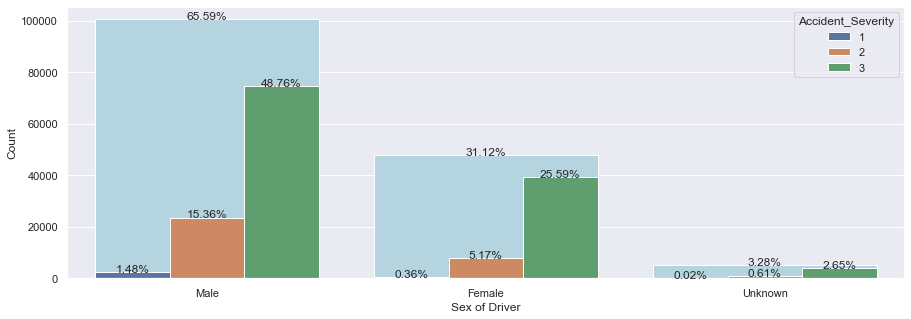

In [66]:
plt.figure(figsize=(15,5))
sex = sns.countplot(x= final_df['Sex_of_Driver'], color= 'lightblue')
sns.countplot(x= final_df['Sex_of_Driver'], hue = final_df['Accident_Severity'])
sex.set(xlabel = 'Sex of Driver', ylabel ='Count', xticklabels =['Male', 'Female', 'Unknown'])

for p in sex.patches: 
    height = p.get_height() 
    sex.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(final_df))*100)+'%',  
      ha="center")
             
plt.show()

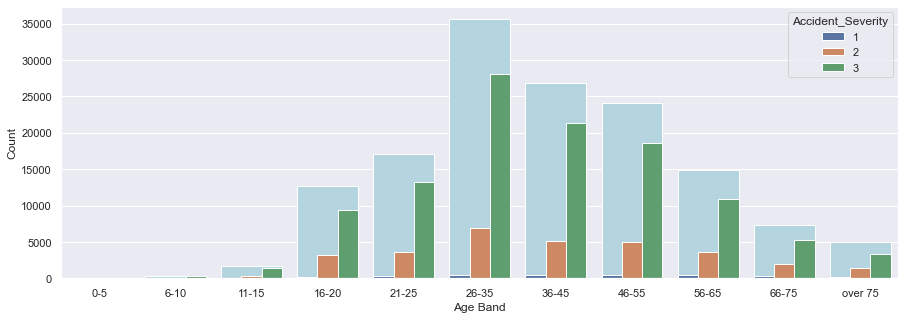

In [67]:
age_band = final_df[final_df.Age_Band_of_Driver!= -1]
plt.figure(figsize=(15,5))
age =sns.countplot(x= age_band['Age_Band_of_Driver'], color= 'lightblue')
sns.countplot(x= age_band['Age_Band_of_Driver'],hue = age_band['Accident_Severity'])
age.set(xlabel='Age Band',ylabel='Count',xticklabels=['0-5', '6-10','11-15','16-20',
                                                                       '21-25', '26-35','36-45','46-55',
                                                                       '56-65','66-75', 'over 75'])

plt.show()

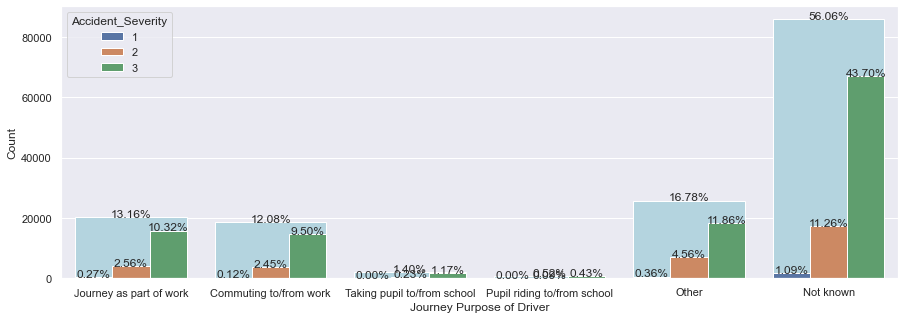

In [68]:
journey_p = final_df
journey_p = journey_p[journey_p.Journey_Purpose_of_Driver != -1]
plt.figure(figsize=(15,5))

jplot = sns.countplot(x='Journey_Purpose_of_Driver',data=journey_p ,color= 'lightblue')
sns.countplot(x='Journey_Purpose_of_Driver',hue = 'Accident_Severity',data=journey_p)
jplot.set(xlabel='Journey Purpose of Driver',ylabel='Count',xticklabels=['Journey as part of work','Commuting to/from work','Taking pupil to/from school','Pupil riding to/from school','Other','Not known'])
for p in jplot.patches: 
    height = p.get_height() 
    jplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(journey_p))*100)+'%',  
      ha="center") 
plt.show()

# Section 3 
#### This section is subdivided into:
- 1. Creating a  Non-fatal based Dataset
- 2. Feature Selection
- 3. Model Building and performance Enumeration
- 4. Comparison with Government's Model

## Creating a Non- Fatal Dataset for classification

In [69]:
non_fatal_based = final_df[final_df['Casualty_Severity']!=1]
len(non_fatal_based)

151406

## Feature selection


In [70]:
Predictors =non_fatal_based[[ 'Vehicle_Type',
       'Vehicle_Manoeuvre',
        'Journey_Purpose_of_Driver',
       'Sex_of_Driver', 'Age_Band_of_Driver', 'Engine_Capacity_(CC)',
       'Propulsion_Code', 'Age_of_Vehicle',
       'Casualty_Class', 'Sex_of_Casualty', 'Pedestrian_Location',
       'Pedestrian_Movement',
        'Casualty_Type',
        'Number_of_Vehicles',
       'Number_of_Casualties', 'Day_of_Week', 'Road_Type',
       'Speed_limit', 'Junction_Detail',
       'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident']].copy()
target = non_fatal_based['Casualty_Severity']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(Predictors, target,test_size = 0.3 ,random_state=42)


In [72]:
classifier = RandomForestClassifier(n_estimators=1000, max_depth = 15, random_state=42, n_jobs=-1)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=1000, n_jobs=-1,
                       random_state=42)

In [73]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8354541851966008

In [74]:
selected_features = []
for k,v in sorted(zip(classifier.feature_importances_,X_train.columns),reverse = True):
    selected_features.append(v)
    print(f'{v}: {k}')
    
    

Casualty_Type: 0.08295697039162299
Engine_Capacity_(CC): 0.0828875339437114
Vehicle_Manoeuvre: 0.07969833450758043
Age_Band_of_Driver: 0.0664107299101293
Age_of_Vehicle: 0.0651764962879725
Vehicle_Type: 0.06388161849220585
Day_of_Week: 0.05448667619133683
Speed_limit: 0.051226961924700984
Number_of_Vehicles: 0.04636935652718971
Did_Police_Officer_Attend_Scene_of_Accident: 0.043721522275167436
Junction_Detail: 0.04371343333423473
Journey_Purpose_of_Driver: 0.03410618667308574
Number_of_Casualties: 0.030569833609499542
Light_Conditions: 0.029054620720623234
Road_Type: 0.029007575078284827
Weather_Conditions: 0.026021289446099157
Urban_or_Rural_Area: 0.025445502415032042
Pedestrian_Location: 0.02390722974459516
Road_Surface_Conditions: 0.02131565202333515
Pedestrian_Movement: 0.019171852258419133
Propulsion_Code: 0.01846575451481219
Casualty_Class: 0.018091186126051376
Sex_of_Driver: 0.017293936848789642
Sex_of_Casualty: 0.01703861266819626
Special_Conditions_at_Site: 0.009981134087324322

In [75]:
selected_feautures = selected_features[0:17]
selected_feautures

['Casualty_Type',
 'Engine_Capacity_(CC)',
 'Vehicle_Manoeuvre',
 'Age_Band_of_Driver',
 'Age_of_Vehicle',
 'Vehicle_Type',
 'Day_of_Week',
 'Speed_limit',
 'Number_of_Vehicles',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Junction_Detail',
 'Journey_Purpose_of_Driver',
 'Number_of_Casualties',
 'Light_Conditions',
 'Road_Type',
 'Weather_Conditions',
 'Urban_or_Rural_Area']

## Building Different Classification Models

In [76]:
df= non_fatal_based.filter(['Weather_Conditions','Speed_limit', 'Day_of_Week','Casualty_Type',
                      'Junction_Detail','Number_of_Vehicles','Age_of_Vehicle',
                     'Journey_Purpose_of_Driver', 'Road_Type','Urban_or_Rural_Area',
                      'Light_Conditions','Number_of_Casualties','Engine_Capacity_(CC)','Junction_Detail', 
                      'Vehicle_Manoeuvre','Did_Police_Officer_Attend_Scene_of_Accident','Vehicle_Type','Casualty_Severity'], axis=1)


df

,Weather_Conditions,Speed_limit,Day_of_Week,Casualty_Type,Junction_Detail,Number_of_Vehicles,Age_of_Vehicle,Journey_Purpose_of_Driver,Road_Type,Urban_or_Rural_Area,Light_Conditions,Number_of_Casualties,Engine_Capacity_(CC),Junction_Detail,Vehicle_Manoeuvre,Did_Police_Officer_Attend_Scene_of_Accident,Vehicle_Type,Casualty_Severity
0,1,30,2,9,1,2,-1,6,1,1,1,3,-1,1,-1,3,9,3
1,1,30,2,9,1,2,-1,6,1,1,1,3,-1,1,-1,3,9,3
2,1,30,2,9,1,2,-1,6,1,1,1,3,-1,1,-1,3,9,3
3,1,30,3,9,0,2,-1,6,2,1,4,1,-1,0,18,3,9,3
4,1,30,3,1,3,2,-1,1,6,1,4,1,-1,3,4,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153153,1,60,7,19,0,1,14,1,6,2,1,1,1997,0,17,1,19,3
153154,1,60,5,19,0,4,1,1,6,2,1,1,2143,0,18,1,19,3
153155,1,60,6,9,3,2,5,6,6,2,1,1,2967,3,18,2,9,3
153156,1,30,7,0,3,1,6,5,6,2,1,1,1597,3,7,2,9,3


In [77]:
Target = df['Casualty_Severity']
predictors =df.drop(columns = 'Casualty_Severity',axis=1)


Class=3, n=125461 (82.864%)
Class=2, n=25945 (17.136%)


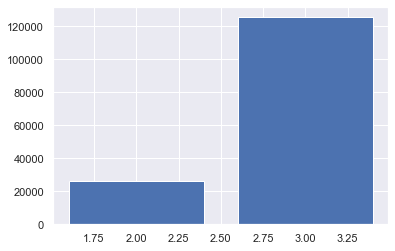

In [78]:
counter = Counter(Target)
for k,v in counter.items():
    per = v / len(Target) * 100

    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

#### The dataset Target values are imbalanced where there is a class minority in the class 2. we can balance this dataset by oversampling or undersampling technique. In the next notebook cell , SMOTE technique is used to balance the target class


In [79]:
oversample = SMOTE()
X, y = oversample.fit_resample(predictors.values, Target)



Class=3, n=125461 (50.000%)
Class=2, n=125461 (50.000%)


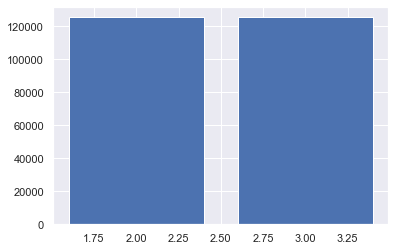

In [80]:
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100

    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25 ,random_state=42)

## Naive Bayes

In [82]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

F1 Score is: 0.6650280688925769
              precision    recall  f1-score   support

           2       0.65      0.75      0.69     31530
           3       0.70      0.58      0.64     31201

    accuracy                           0.67     62731
   macro avg       0.67      0.67      0.67     62731
weighted avg       0.67      0.67      0.67     62731



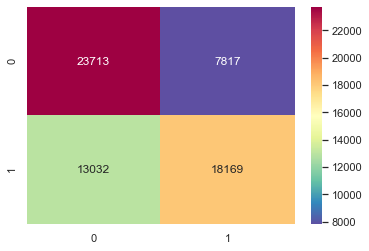

In [83]:
y_pred = nb_model.predict(X_test)
Naive_f1 =f1_score(y_test, y_pred, average='macro')
print('F1 Score is:',Naive_f1)
print(classification_report( y_test, y_pred))
nb_mat = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(nb_mat), annot=True, cmap="Spectral_r" ,fmt='g')


## Random Forest Classifier

In [84]:
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

F1 Score is: 0.8406688944531584
              precision    recall  f1-score   support

           2       0.83      0.86      0.84     31530
           3       0.85      0.82      0.84     31201

    accuracy                           0.84     62731
   macro avg       0.84      0.84      0.84     62731
weighted avg       0.84      0.84      0.84     62731

0.8407485931995345


<AxesSubplot:>

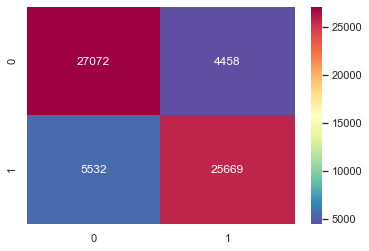

In [85]:
y_pred = model.predict(X_test)
rf_f1 =f1_score(y_test, y_pred, average='macro')
print('F1 Score is:',rf_f1)
print(classification_report( y_test, y_pred))
print(model.score(X_test, y_test))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(mat), annot=True, cmap="Spectral_r" ,fmt='g')

## Decision Tree

In [86]:
Dt =DecisionTreeClassifier()
Dt.fit(X_train, y_train)



DecisionTreeClassifier()

F1 Score is: 0.7923470513580808
0.7926702906059205
              precision    recall  f1-score   support

           2       0.78      0.83      0.80     31530
           3       0.81      0.76      0.78     31201

    accuracy                           0.79     62731
   macro avg       0.79      0.79      0.79     62731
weighted avg       0.79      0.79      0.79     62731



<AxesSubplot:>

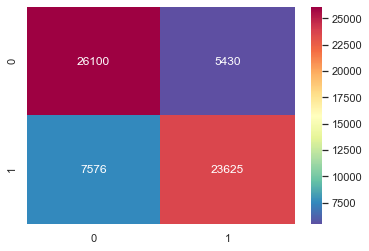

In [87]:
y_pred = Dt.predict(X_test)
dt_f1= f1_score(y_test, y_pred, average='macro')
print ('F1 Score is:',dt_f1)
print(Dt.score(X_test, y_test))
print(classification_report( y_test, y_pred))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(mat), annot=True, cmap="Spectral_r" ,fmt='g')

In [88]:
KNC = KNeighborsClassifier()
KNC.fit(X_train, y_train)

KNeighborsClassifier()

F1 Score is: 0.7796430899102169
              precision    recall  f1-score   support

           2       0.73      0.91      0.81     31530
           3       0.88      0.65      0.75     31201

    accuracy                           0.78     62731
   macro avg       0.80      0.78      0.78     62731
weighted avg       0.80      0.78      0.78     62731

0.7835838740016897


<AxesSubplot:>

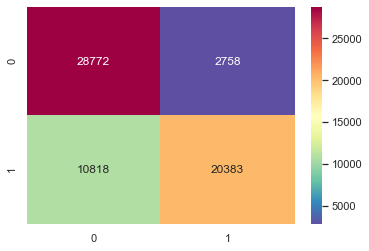

In [89]:
y_pred = KNC.predict(X_test)
Knc_f1 = f1_score(y_test, y_pred, average='macro')
print('F1 Score is:',Knc_f1)

print(classification_report( y_test, y_pred))
print(KNC.score(X_test, y_test))
mat1 = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(mat1), annot=True, cmap="Spectral_r" ,fmt='g')


## Evaluating models Performance
- The F1-score was used as a metric of comparison since it combines the precision and recall of a classifier into a single metric by taking their harmonic mean. 

In [90]:
models_accuracy = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Naive Bayes','k NearestNeighbour'],
    'Score': [rf_f1,dt_f1,Naive_f1, Knc_f1]
})

In [91]:
models_accuracy

,Model,Score
0,Random Forest,0.840669
1,Decision Tree,0.792347
2,Naive Bayes,0.665028
3,k NearestNeighbour,0.779643


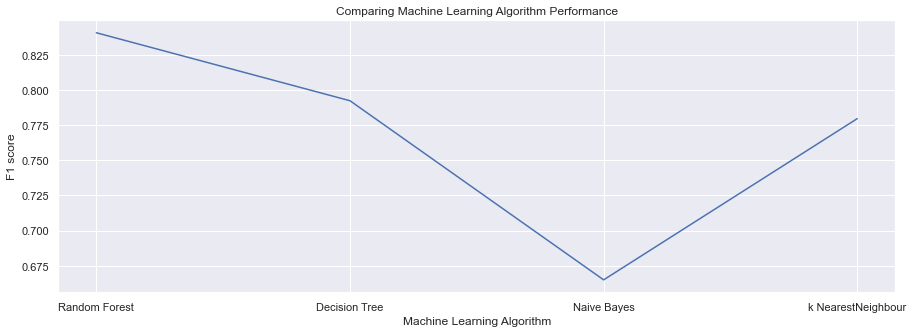

In [92]:
plt.figure(figsize = (15,5))
line=sns.lineplot(x=models_accuracy['Model'],y=models_accuracy['Score'])
line.set(ylabel= 'F1 score', xlabel= 'Machine Learning Algorithm')
plt.title('Comparing Machine Learning Algorithm Performance')
plt.show()

- from the line plot and confusion matrixes , the Random Forest Classifier performed the best with an  F1 score of 84%, the Naive Bayes performs the worst since the features do not follow the assumption of independance

### Comparing Model'S Performance with Government Model


In [93]:
cas = pd.read_csv('cas_adjustment_lookup_2019.csv')


### Extracting Government Model probability

In [94]:
govt_model_2019 = cas[cas['accident_index'].str.startswith('2019')]
govt_model_2019_prob= np.array(govt_model_2019[['Adjusted_Serious','Adjusted_Slight']])
govt_model_2019_prob= govt_model_2019_prob[:, 1]
y_govt_test =non_fatal_based['Casualty_Severity']

### Top Model Probability

In [95]:
model_pred = model.predict_proba(X_test)
model_pred_ = model_pred[:,1]
y_model_test = y_test

### Plotting the ROC curve for comparison

Government Model: ROC AUC=0.961
Top Model: ROC AUC=0.913


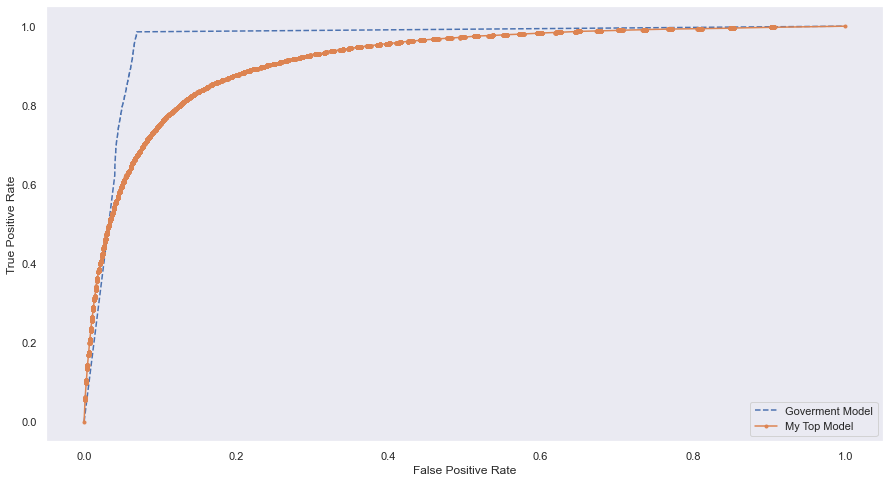

In [97]:
govt_model = roc_auc_score(y_govt_test, govt_model_2019_prob)
my_model = roc_auc_score(y_model_test, model_pred_)
print('Government Model: ROC AUC=%.3f' % (govt_model))
print('Top Model: ROC AUC=%.3f' % (my_model ))
govt_fpr, govt_tpr, _ = roc_curve(y_govt_test, govt_model_2019_prob,pos_label= 3)
model_fpr, model_tpr, _ = roc_curve(y_test, model_pred_, pos_label= 3)
plt.figure(figsize=(15, 8))
plt.plot(govt_fpr, govt_tpr, linestyle='--', label='Goverment Model')
plt.plot(model_fpr, model_tpr, marker='.', label='My Top Model')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.grid(False)
# show the plot
plt.show()



### Conclusion
- in conclusion using the Roc Auc score as a metric the Government model slightly overperformed my top model with their respective scores as 96.1% and 91.3% respectively